# Correction TP4

## Exercice 1: La régression linéaire par moindres carrés sous sklearn

### Q1.1 Etude d’un régresseur linéaire simple

#### Q1.1.2 à Q1.1.4

MSE = 121.7741935483871
Score = 0.8782258064516129
Paramètres = [-42.58064516] 644.5161290322579


<IPython.core.display.Javascript object>


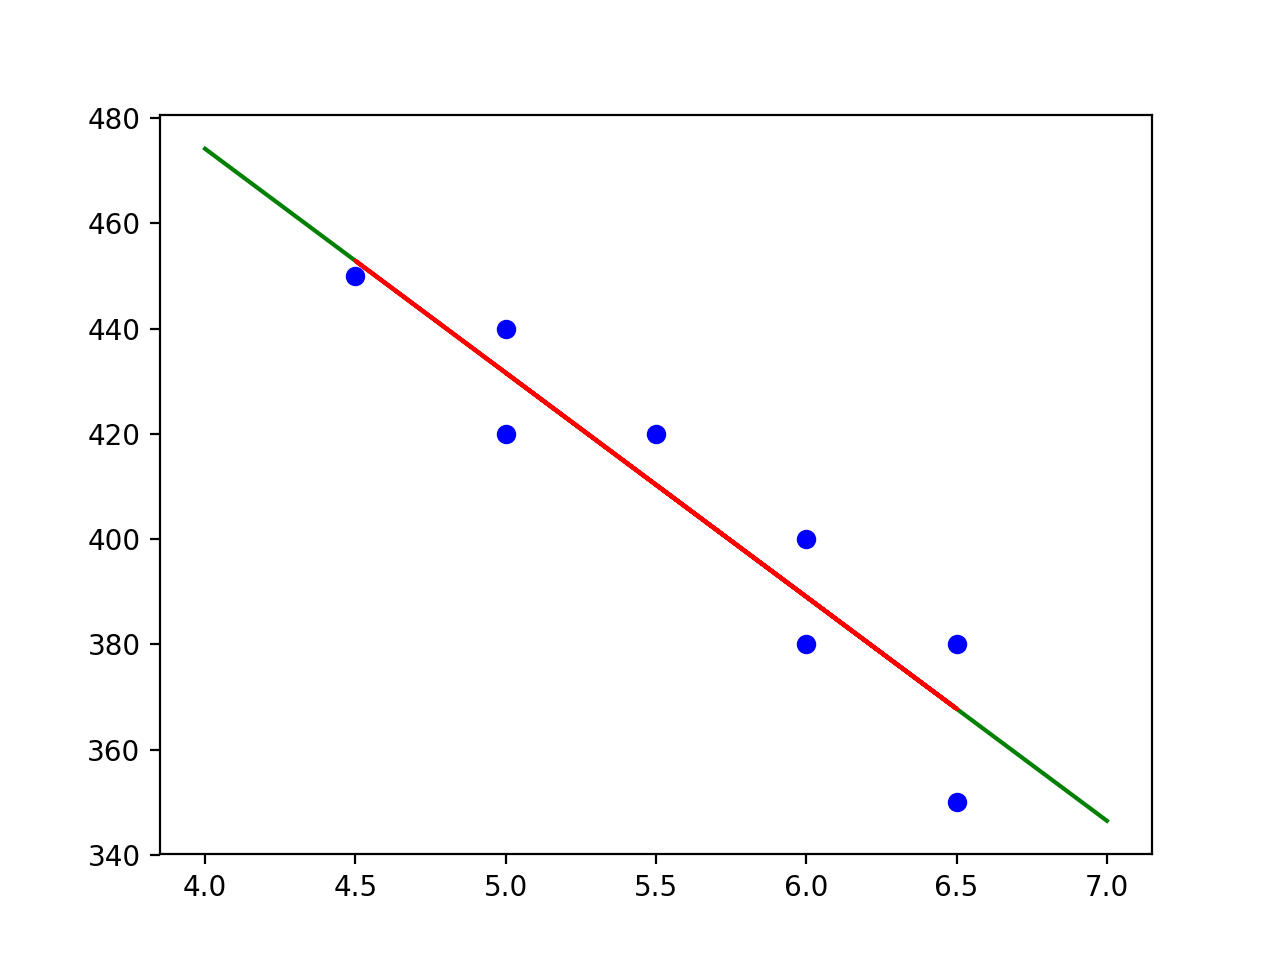

In [2]:
%matplotlib notebook
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x = np.array([5.5,6.0,6.5,6.0,5.0,6.5,4.5,5])
X = x.reshape(-1,1)
y = np.array([420,380,350,400,440,380,450,420])
lr = LinearRegression()
# Apprentissage du régresseur
lr.fit(X,y)
# Affichage du score MSE calcule sur exemples d'apprentissage (empirique)
print("MSE = "+str(mean_squared_error(y,lr.predict(X))))
# Coefficient de determination
print("Score = "+str(lr.score(X,y))) 
# Affichage des parametres appris: les valeurs des coefficients de l'equation de droite alpha et beta
print("Paramètres = "+str(lr.coef_)+" "+str(lr.intercept_))

# Affichage du nuage de points et des droites

# deux points sur la droite apprise, pour affichage en vert
x0, x1 = 4.0,7.0 
y0 = lr.coef_*x0+lr.intercept_
y1 = lr.coef_*x1+lr.intercept_
plt.plot([x0,x1], [y0,y1], 'g')
# le nuage de points
plt.scatter(x,y,c="blue")
# la droite predicte calculee sur toutes les donnees
plt.plot(X,lr.predict(X),'r')
plt.show()

Au regard de l'échelle de grandeur des données, la MSE semble petite, donc bonne. Les droites rouges et vertes coincident.

#### Q1.1.5

MSE = 6385.116731517507
Score = -5.385116731517507
Paramètres = [70.27237354] 0.0


<IPython.core.display.Javascript object>


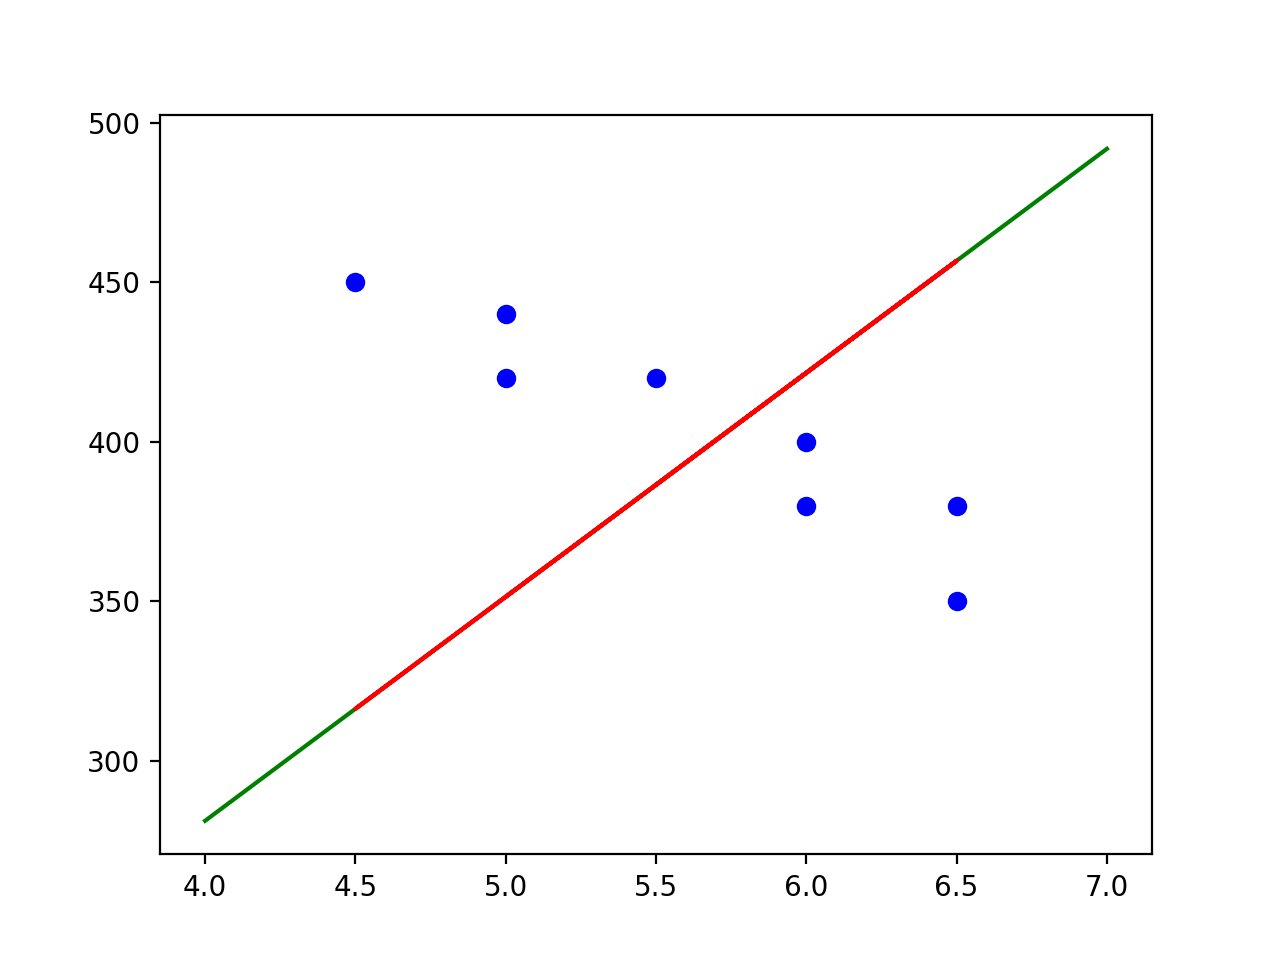

In [3]:
%matplotlib notebook
x = np.array([5.5,6.0,6.5,6.0,5.0,6.5,4.5,5])
X = x.reshape(-1,1)
y = np.array([420,380,350,400,440,380,450,420])
#
# Apprentissage du regresseur sans calcul du biais
#
lr = LinearRegression(fit_intercept=False)
lr.fit(X,y)
print("MSE = "+str(mean_squared_error(y,lr.predict(X))))
print("Score = "+str(lr.score(X,y))) # coefficient de determination
print("Paramètres = "+str(lr.coef_)+" "+str(lr.intercept_))    
x0, x1 = 4.0,7.0
y0 = lr.coef_*x0+lr.intercept_
y1 = lr.coef_*x1+lr.intercept_
plt.plot([x0,x1], [y0,y1], 'g')
plt.scatter(x,y,c="blue")
plt.plot(X,lr.predict(X),'r')
plt.show()  

Dans cette option d'apprentissage, on force la droite de régression à passer par l'origine. Ceci n'est intéressant que si les données ont été préalablement standardisées, c'est à dire transformées adéquatement pour être centrées sur l'origine tout en respectant les corrélations.

### Q1.2 Jeu de données Eucalyptus

#### Q1.2.1 et Q1.2.2

In [4]:
def q121():
    data = np.loadtxt('eucalyptus.txt')
    h = data[:,0]
    c = data[:,1]
    return h,c

<IPython.core.display.Javascript object>


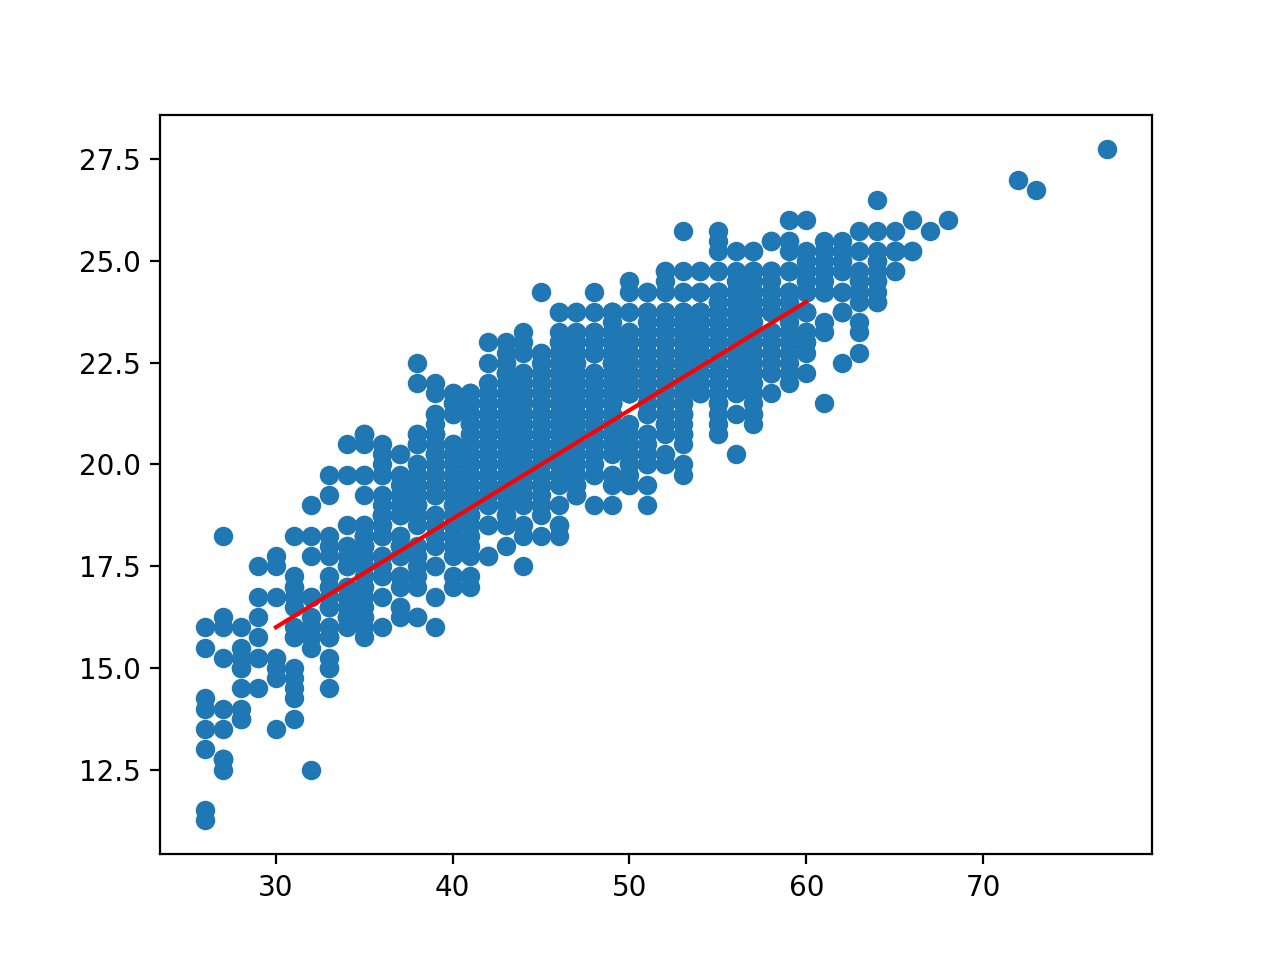

In [5]:
%matplotlib notebook
h,c = q121()
plt.scatter(c,h)

Oui, il semble qu'il y ait une correllation linéaire positive ; on pourrait imaginer que la droite passant par les points (30,16) (60,24) est une estimation "à la louche" de cette relation.

In [6]:
plt.plot([30,60], [16,24], c='r')

#### Q1.2.3

Paramètres = [0.25713786] 9.037475668452768


<IPython.core.display.Javascript object>


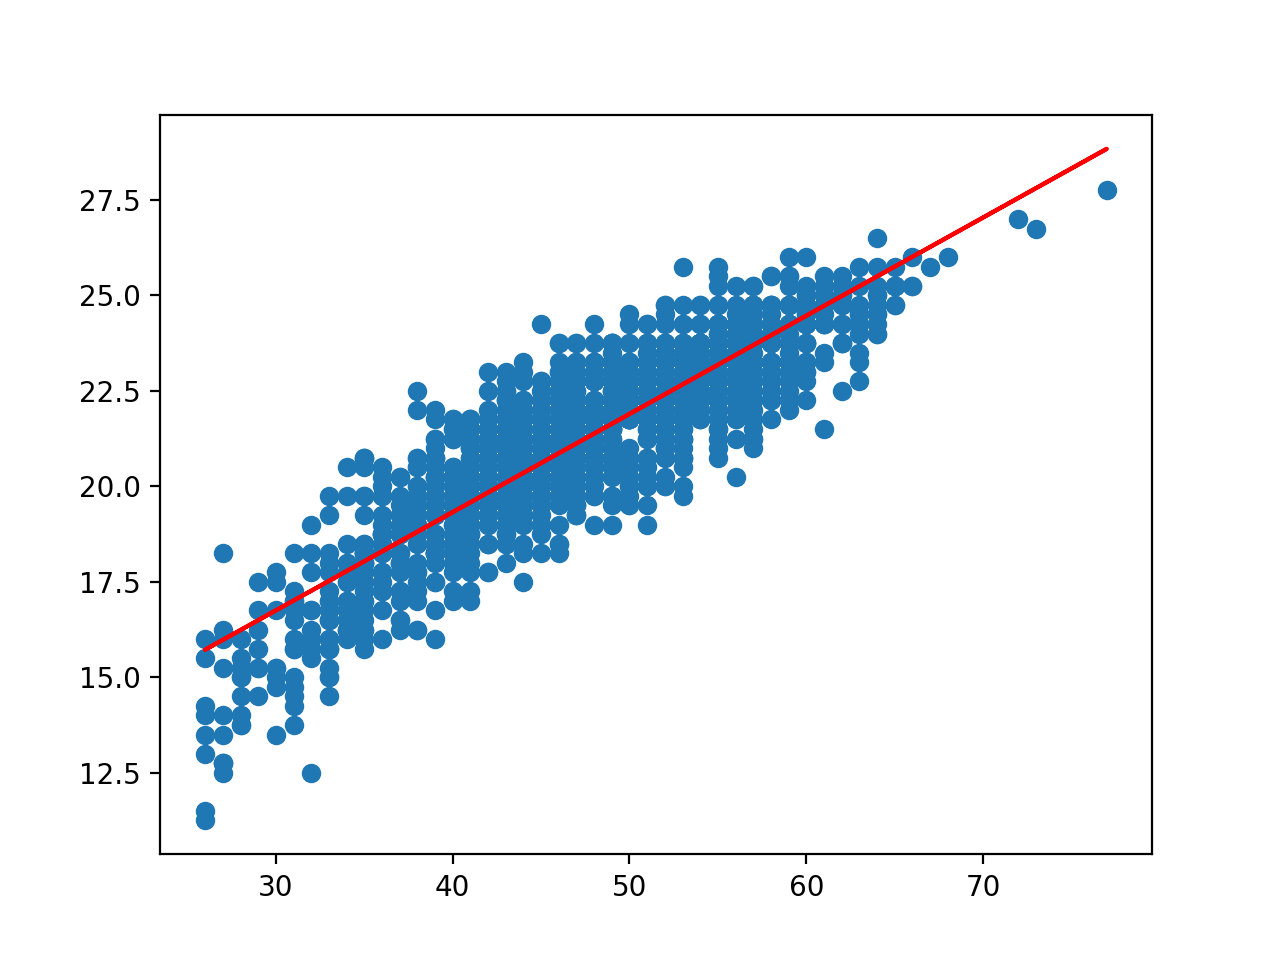

Score = 0.7024780078821247


In [7]:
%matplotlib notebook
from sklearn.model_selection import cross_val_score

h,c = q121()
C = c.reshape(-1,1) #obtention d'un X multivarie avec une seule variable
#
# Entrainement
#
lr = LinearRegression()
lr.fit(C,h)
print("Paramètres = "+str(lr.coef_)+" "+str(lr.intercept_))
#
# Affichage graphique
#
plt.scatter(c,h)
plt.plot(c,lr.predict(C),'r')
#
# coefficient de determination (score) par validation croisee 10 folds
#
lr = LinearRegression()
scores = cross_val_score(lr, C, h, cv=10)    
print("Score = "+str(scores.mean())) # coefficient de determination

In [8]:
# le score pour l'eucalyptus de circonference x=22.8
lr.fit(C,h)
print(lr.predict(np.array([22.8]).reshape(1, -1)))

[14.90021876]


On obtient une hauteur de 14,90

#### Q1.2.4

Paramètres = [-0.48294547  9.98688814] -24.35200327424318


<IPython.core.display.Javascript object>


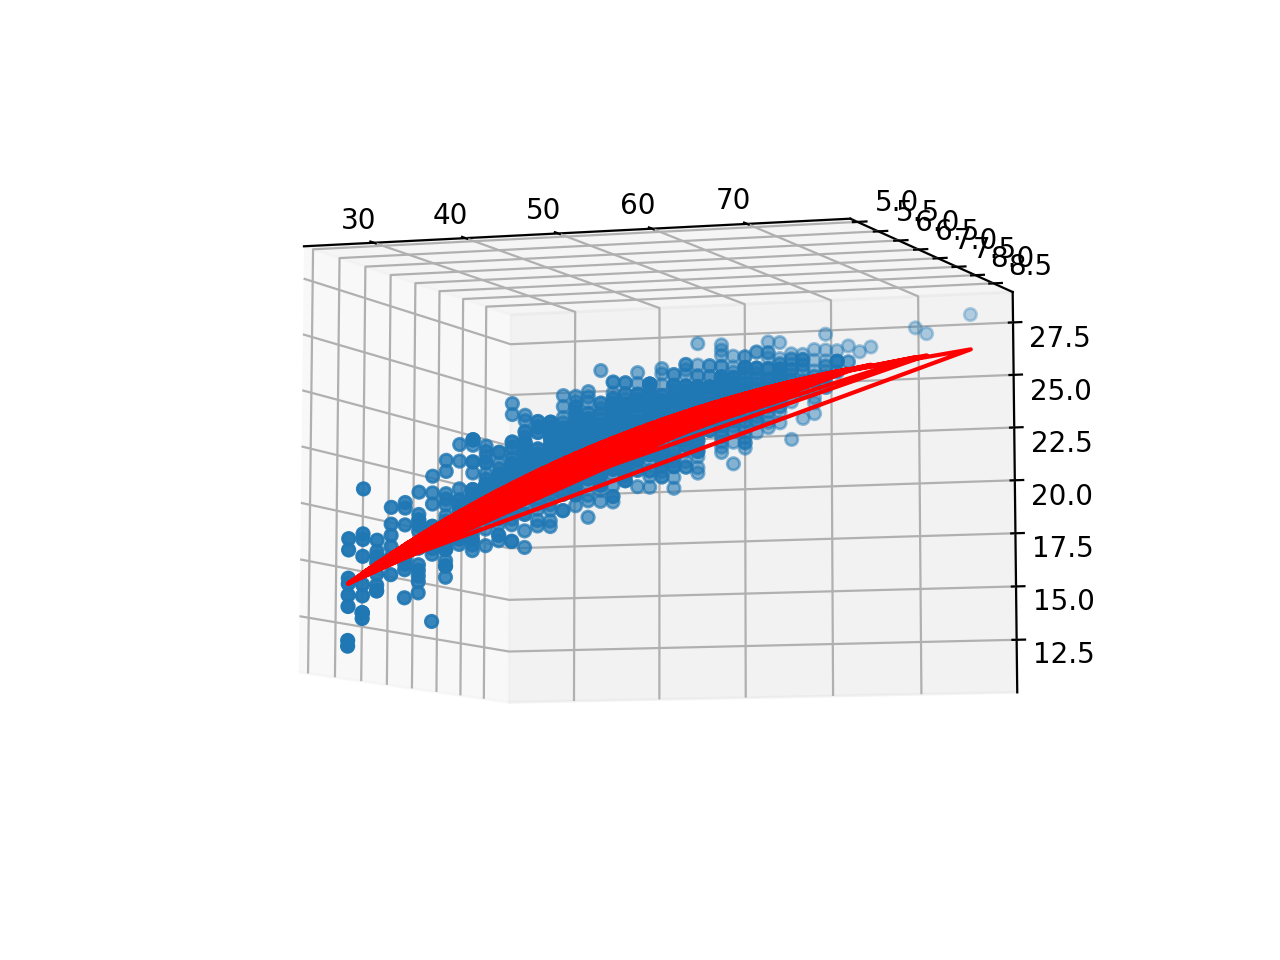

Score = 0.732887007288068


In [9]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

h,c = q121()
s = np.sqrt(c)
C = c.reshape(-1,1)
S = np.sqrt(C)
CS = np.concatenate((C,S),axis=1)
#
# Entrainement
#
lr = LinearRegression()
lr.fit(CS,h)
print("Paramètres = "+str(lr.coef_)+" "+str(lr.intercept_))
#
# Affichage graphique
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(c,s,h)
ax.plot(c,s,lr.predict(CS),'r')
#
# coefficient de determination (score) par validation croisee 10 folds
#
lr = LinearRegression()
scores = cross_val_score(lr, CS, h, cv=10)
print("Score = "+str(scores.mean())) # coefficient de determination

On obtient en effet un score (coefficient de détermination) légèrement meilleur.

#### Q1.2.5

In [29]:
h,c = q121()
C = c.reshape(-1,1)
S = np.sqrt(C)
CAR = C**2
CS = np.concatenate((C,S),axis=1)
TOT = np.concatenate((CS,CAR),axis=1)
#
# Entrainement
#
lr = LinearRegression()
lr.fit(TOT,h)
print("Paramètres = "+str(lr.coef_)+" "+str(lr.intercept_))
#
# coefficient de determination (score) par validation croisee 10 folds
#
lr = LinearRegression()
scores = cross_val_score(lr, TOT, h, cv=10)
print("Score = "+str(scores.mean())) # coefficient de determination

Paramètres = [-2.77594347e+00  3.02868608e+01  8.46121691e-03] -74.45820187627979
Score = 0.7351224466101037


**Q1.2.6** Avec la fonction carré pour une quatrième colonne en plus de celle de racine-carrée, on améliore sensiblement le score encore une fois.